In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import argparse,os

In [11]:
exp_m = pd.read_csv("/home/bruce1996/data/LIHC_anomaly_detection/ensemble_training/hbv_only_coding_gene_std_by_gene_with_synthetic.txt",sep='\t',index_col=0)
hallmark = pd.read_csv("/home/bruce1996/data/LIHC_anomaly_detection/data/hallmark_gene/hallmark_protein_coding_ens_id.txt",sep='\t')
hallmark_gene = hallmark['EnsID'].values

In [13]:
hallmark_m = exp_m.loc[hallmark_gene,:]
sym_idx = ['Synthetic' in x for x in exp_m.index]
syn_m = exp_m.loc[sym_idx,:]

In [19]:
def data_augmentatation_pca_scatterplot(origin_m,synthetic_m,fig_output_path) :
    
    x = np.concatenate([origin_m,synthetic_m],axis=0)
    pca = PCA(n_components=3)
    syn_pca = pca.fit_transform(x)
    pca_df = pd.DataFrame({'PC1' : syn_pca[:,0],'PC2' : syn_pca[:,1],'PC3' : syn_pca[:,2],
                           'Label' : ['Origin'] *origin_m.shape[0] + ['Syntheitc'] * synthetic_m.shape[0]})

    fig,axs = plt.subplots(1,2,figsize = (16,7))
    sns.scatterplot(data = pca_df,x = 'PC1',y = 'PC2',hue = 'Label',palette='Set2',ax = axs[0])
    sns.scatterplot(data = pca_df,x = 'PC3',y = 'PC2',hue = 'Label',palette='Set2',ax=axs[1])

    axs[0].set_xlabel("PC1 (" + str(round(100*pca.explained_variance_ratio_[0],2)) + '%)')  # type: ignore
    axs[0].set_ylabel("PC2 (" + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)')  # type: ignore
    axs[1].set_xlabel("PC3 (" + str(round(100*pca.explained_variance_ratio_[2],2)) + '%)')  # type: ignore
    axs[1].set_ylabel("PC2 (" + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)')  # type: ignore
    plt.savefig(fig_output_path,dpi = 300,bbox_inches = 'tight')

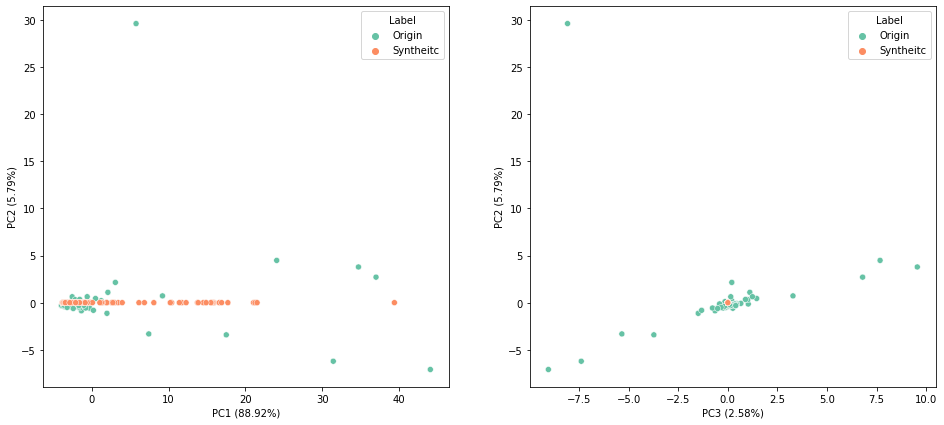

In [20]:
data_augmentatation_pca_scatterplot(hallmark_m,syn_m,'/home/bruce1996/data/LIHC_anomaly_detection/manuscript/material/data_augmentation/hallmark_data_augmentation_pca.png')